In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Graficar inline
%matplotlib inline

In [5]:
secuestro = pd.read_csv("./datos/Reporte_Delito_Secuestro_Polic_a_Nacional.csv", encoding = "latin-1")
secuestro


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCION CONDUCTA,CANTIDAD
0,CASANARE,YOPAL (CT),85001000,ARMA BLANCA / CORTOPUNZANTE,03/01/2010,MASCULINO,ADULTOS,ARTÃCULO 168. SECUESTRO SIMPLE,1
1,ANTIOQUIA,BRICEÃO,5107000,ARMA BLANCA / CORTOPUNZANTE,05/01/2010,MASCULINO,ADULTOS,ARTÃCULO 169. SECUESTRO EXTORSIVO,1
2,ARAUCA,TAME,81794000,ARMA BLANCA / CORTOPUNZANTE,05/01/2010,MASCULINO,ADULTOS,ARTÃCULO 168. SECUESTRO SIMPLE,1
3,CESAR,AGUACHICA,20011000,ARMA BLANCA / CORTOPUNZANTE,08/01/2010,MASCULINO,ADULTOS,ARTÃCULO 169. SECUESTRO EXTORSIVO,1
4,GUAJIRA,DIBULLA,44090000,ARMA BLANCA / CORTOPUNZANTE,09/01/2010,FEMENINO,ADULTOS,ARTÃCULO 169. SECUESTRO EXTORSIVO,1
...,...,...,...,...,...,...,...,...,...
2524,VALLE,BUENAVENTURA,76109000,SIN EMPLEO DE ARMAS,06/06/2021,MASCULINO,ADULTOS,ARTÃCULO 168. SECUESTRO SIMPLE,2
2525,VALLE,BUENAVENTURA,76109000,SIN EMPLEO DE ARMAS,06/06/2021,MASCULINO,ADULTOS,ARTÃCULO 168. SECUESTRO SIMPLE,1
2526,TOLIMA,ARMERO,73055000,ARMA DE FUEGO,09/06/2021,MASCULINO,ADULTOS,ARTÃCULO 169. SECUESTRO EXTORSIVO,1
2527,TOLIMA,ARMERO,73055000,ARMA DE FUEGO,09/06/2021,MASCULINO,ADULTOS,ARTÃCULO 169. SECUESTRO EXTORSIVO,1


In [7]:
secuestro.shape


(2529, 9)

In [8]:
secuestro.dtypes


DEPARTAMENTO            object
MUNICIPIO               object
CODIGO DANE              int64
ARMAS MEDIOS            object
FECHA HECHO             object
GENERO                  object
GRUPO ETARIO            object
DESCRIPCION CONDUCTA    object
CANTIDAD                 int64
dtype: object

In [24]:
secuestro.drop_duplicates()
## Como recomendacion para mejorar la calidad de los datos se eliminaron los datos repetidos

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCION CONDUCTA,CANTIDAD
0,CASANARE,YOPAL (CT),85001000,ARMA BLANCA / CORTOPUNZANTE,2010-03-01,MASCULINO,ADULTOS,ARTÃCULO 168. SECUESTRO SIMPLE,1
1,ANTIOQUIA,BRICEÃO,5107000,ARMA BLANCA / CORTOPUNZANTE,2010-05-01,MASCULINO,ADULTOS,ARTÃCULO 169. SECUESTRO EXTORSIVO,1
2,ARAUCA,TAME,81794000,ARMA BLANCA / CORTOPUNZANTE,2010-05-01,MASCULINO,ADULTOS,ARTÃCULO 168. SECUESTRO SIMPLE,1
3,CESAR,AGUACHICA,20011000,ARMA BLANCA / CORTOPUNZANTE,2010-08-01,MASCULINO,ADULTOS,ARTÃCULO 169. SECUESTRO EXTORSIVO,1
4,GUAJIRA,DIBULLA,44090000,ARMA BLANCA / CORTOPUNZANTE,2010-09-01,FEMENINO,ADULTOS,ARTÃCULO 169. SECUESTRO EXTORSIVO,1
...,...,...,...,...,...,...,...,...,...
2523,ATLÃNTICO,BARRANQUILLA (CT),8001000,SIN EMPLEO DE ARMAS,2021-03-06,FEMENINO,ADULTOS,ARTÃCULO 169. SECUESTRO EXTORSIVO,1
2524,VALLE,BUENAVENTURA,76109000,SIN EMPLEO DE ARMAS,2021-06-06,MASCULINO,ADULTOS,ARTÃCULO 168. SECUESTRO SIMPLE,2
2525,VALLE,BUENAVENTURA,76109000,SIN EMPLEO DE ARMAS,2021-06-06,MASCULINO,ADULTOS,ARTÃCULO 168. SECUESTRO SIMPLE,1
2526,TOLIMA,ARMERO,73055000,ARMA DE FUEGO,2021-09-06,MASCULINO,ADULTOS,ARTÃCULO 169. SECUESTRO EXTORSIVO,1


In [11]:
secuestro['FECHA HECHO'] = pd.to_datetime(secuestro['FECHA HECHO'])
## Como recomendacion para mejorar la calidad de los datos se cambio el formato de la fecha a datetime

In [13]:

## 1 Parte 1 - Top 3 departamentos que evidencias casos de secuestro a nivel historico 
departamento_f = secuestro['DEPARTAMENTO'].value_counts().to_frame()
departamento_f.head(3)
## Como se puede evidenciar que el TOP 3 de departamentos mayor mente afectados historicamente son valle, cundinamarca y antioquia  

,DEPARTAMENTO
VALLE,308
CUNDINAMARCA,284
ANTIOQUIA,254


In [14]:
## 1 Parte 2 - Top 3 departamentos que evidencias casos de secuestro en el ultimo año
filtered_d= secuestro[secuestro['FECHA HECHO'].isin(pd.date_range('2020-01-01', '2020-12-30'))]
frecuencia = filtered_d['DEPARTAMENTO'].value_counts().to_frame()
frecuencia.head(3)

,DEPARTAMENTO
ANTIOQUIA,24
VALLE,22
CUNDINAMARCA,19


In [16]:
## Como se puede evidenciar que el TOP 3 de departamentos mayor mente afectados en el ultimo año (2020). siguen siendo cundinamarca, antioquia y valle.
## sin embargo se ve un cambio en el orden ya que antioquia pasa de tener la menor cantidad a la mayor en el ultimo año 

In [17]:
##2 Arma mas frecuente
arma_f = secuestro['ARMAS MEDIOS'].value_counts().to_frame()
arma_f.head(3)

,ARMAS MEDIOS
ARMA BLANCA / CORTOPUNZANTE,986
ARMA DE FUEGO,857
NO REPORTADO,381


In [18]:
## a pesar de que no es por mucho el arma blanca predomina en ser el elemento mayor usado para este crimen
arma_f_p = secuestro['ARMAS MEDIOS'].value_counts(normalize=True)*100
arma_f_p


ARMA BLANCA / CORTOPUNZANTE    38.987742
ARMA DE FUEGO                  33.886912
NO REPORTADO                   15.065243
-                               6.761566
SIN EMPLEO DE ARMAS             4.942665
ESPOSAS                         0.276789
ARMAS BLANCAS                   0.039541
CONTUNDENTES                    0.039541
Name: ARMAS MEDIOS, dtype: float64

<AxesSubplot:>

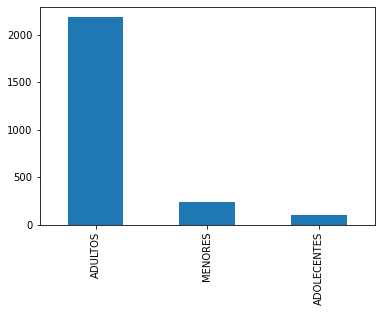

In [19]:
grupo_f = secuestro['GRUPO ETARIO'].value_counts().plot(kind = "bar")
grupo_f

In [20]:
grupo_f_p = secuestro['GRUPO ETARIO'].value_counts(normalize=True)*100
grupo_f_p
## en este caso vemos que el secuestro se aplica en el 86% de los casos a adultos

ADULTOS        86.431962
MENORES         9.533228
ADOLECENTES     4.034810
Name: GRUPO ETARIO, dtype: float64

<AxesSubplot:>

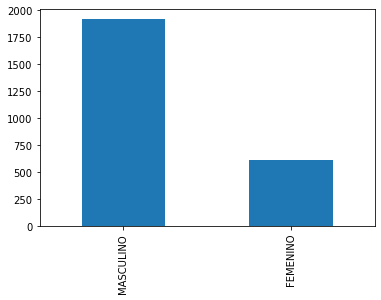

In [21]:
genero_f = secuestro['GENERO'].value_counts().plot(kind = "bar")
genero_f

In [127]:
## y de igual froma el genero masculio sobrepasa por mas de la mitad al femenino 

In [23]:
fechas_d=secuestro['FECHA HECHO'].dt.month.value_counts().to_frame()
fechas_d.head(3)
##4 Se puede evidenciar que la tendencia para cometer este delito es en el mes de marzo (3)

,FECHA HECHO
3,269
8,230
2,220


In [28]:
delito_f=secuestro['DESCRIPCION CONDUCTA'].value_counts().to_frame()
delito_f

,DESCRIPCION CONDUCTA
ARTÃCULO 169. SECUESTRO EXTORSIVO,1502
ARTÃCULO 168. SECUESTRO SIMPLE,1027


In [31]:
##En este caso solo existen dos tipos de secuestro estipulados en la constitucion colombiana 

In [ ]:
##Lamentablenmente los dataSet Seleccionados no cuentan con variables cuantitativas para poder realizar un analisis mas profondo de los datos. 